### Импорт инструментов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Чтение данных, их проверка и подготовка

In [3]:
transactions_df = pd.read_parquet('data/transaction_fraud_data.parquet')

In [5]:
transactions_df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,197.153.60.199,False,False,False,False,1197,3.349856e+07,105,12,1.925481e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,208.123.221.203,True,True,False,True,509,2.011476e+07,100,12,5.149117e+06
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,10.194.159.204,False,False,False,False,332,3.916385e+07,97,12,1.852242e+06
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,17.230.177.225,False,False,False,False,764,2.201260e+07,105,12,2.055798e+06
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,136.241.219.151,True,False,False,True,218,4.827636e+06,88,12,1.157231e+06


In [7]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 27 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   transaction_id                        object        
 1   customer_id                           object        
 2   card_number                           int64         
 3   timestamp                             datetime64[us]
 4   vendor_category                       object        
 5   vendor_type                           object        
 6   vendor                                object        
 7   amount                                float64       
 8   currency                              object        
 9   country                               object        
 10  city                                  object        
 11  city_size                             object        
 12  card_type                             object        
 13  is_card_pres

In [9]:
transactions_df.isnull().sum()

transaction_id                          0
customer_id                             0
card_number                             0
timestamp                               0
vendor_category                         0
vendor_type                             0
vendor                                  0
amount                                  0
currency                                0
country                                 0
city                                    0
city_size                               0
card_type                               0
is_card_present                         0
device                                  0
channel                                 0
device_fingerprint                      0
ip_address                              0
is_outside_home_country                 0
is_high_risk_vendor                     0
is_weekend                              0
is_fraud                                0
last_hour_activity.num_transactions     0
last_hour_activity.total_amount   

In [10]:
transactions_df.duplicated().sum()

np.int64(0)

In [11]:
exchange_df = pd.read_parquet('data/historical_currency_exchange.parquet')

In [12]:
exchange_df.head()

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


In [13]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   AUD     31 non-null     float64       
 2   BRL     31 non-null     float64       
 3   CAD     31 non-null     float64       
 4   EUR     31 non-null     float64       
 5   GBP     31 non-null     float64       
 6   JPY     31 non-null     float64       
 7   MXN     31 non-null     float64       
 8   NGN     31 non-null     float64       
 9   RUB     31 non-null     float64       
 10  SGD     31 non-null     float64       
 11  USD     31 non-null     int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 3.0 KB


In [14]:
exchange_df.isnull().sum()

date    0
AUD     0
BRL     0
CAD     0
EUR     0
GBP     0
JPY     0
MXN     0
NGN     0
RUB     0
SGD     0
USD     0
dtype: int64

In [15]:
exchange_df.duplicated().sum()

np.int64(0)

#### Переименование столбцов вложенной структуры активности за последний час (для удобства)

In [16]:
prefix = 'last_hour_activity'

for column in transactions_df.columns:
    if column.startswith(prefix):
        transactions_df.rename(columns={column: column.replace(prefix, 'lha').replace('.', '_')}, inplace=True)

#### Добавление столбца с суммами в USD

In [48]:
transactions_df['date'] = transactions_df['timestamp'].dt.date

def get_exchange_rate(row, exchange_df):
    currency = row['currency']
    transaction_date = str(row['date'])
    rate = exchange_df.loc[transaction_date][currency]
    
    return rate

transactions_df['exchange_rate'] = transactions_df.apply(get_exchange_rate, axis=1, exchange_df=exchange_df)
transactions_df['amount_usd'] = transactions_df['amount'] / transactions_df['exchange_rate']

transactions_df.drop(columns=['date', 'exchange_rate'], inplace=True)

transactions_df[['amount', 'currency', 'amount_usd']].head()

,amount,currency,amount_usd
0,294.87,GBP,394.658011
1,3368.97,BRL,619.905757
2,102582.38,JPY,719.506409
3,630.60,AUD,436.808287
4,724949.27,NGN,434.430069


### Группировка столбцов (признаков)

In [62]:
num_columns = []
bool_columns = []
categorial_columns = []

ignored_columns = ['transaction_id', 'customer_id', 'card_number', 'device_fingerprint']

for column, dtype in zip(transactions_df.columns, transactions_df.dtypes):
    if str(dtype).startswith('datetime') or column in ignored_columns:
        continue
    
    if dtype == 'object':
        categorial_columns.append(column)
    elif dtype == 'bool':
        bool_columns.append(column)
    else:
        num_columns.append(column)

In [9]:
transactions_df[num_columns].describe()

,amount,lha_num_transactions,lha_total_amount,lha_unique_merchants,lha_unique_countries,lha_max_single_amount
count,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
mean,4.792468e+04,4.091429e+02,1.991719e+07,8.002226e+01,1.066260e+01,1.726432e+06
std,1.775562e+05,3.910964e+02,3.565890e+07,3.047287e+01,2.617777e+00,1.398325e+06
min,1.000000e-02,0.000000e+00,1.454232e-02,0.000000e+00,0.000000e+00,1.454232e-02
25%,3.635300e+02,1.050000e+02,3.367823e+06,6.300000e+01,1.100000e+01,8.015712e+05
50%,1.177450e+03,2.920000e+02,1.017851e+07,9.500000e+01,1.200000e+01,1.235738e+06
75%,2.242953e+04,6.060000e+02,2.273432e+07,1.040000e+02,1.200000e+01,2.290742e+06
max,6.253153e+06,3.962000e+03,1.072915e+09,1.050000e+02,1.200000e+01,6.253153e+06


In [10]:
transactions_df[bool_columns].describe()

,is_card_present,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud
count,7483766,7483766,7483766,7483766,7483766
unique,2,2,2,2,2
top,False,False,False,False,False
freq,6832719,5073605,5611803,5554103,5989047


In [11]:
transactions_df[categorial_columns].describe()

,vendor_category,vendor_type,vendor,currency,country,city,city_size,card_type,device,channel,ip_address
count,7483766,7483766,7483766,7483766,7483766,7483766,7483766,7483766,7483766,7483766,7483766
unique,8,17,105,11,12,11,2,5,9,3,7477187
top,Healthcare,online,Chegg,EUR,Nigeria,Unknown City,medium,Basic Debit,Edge,web,193.254.92.164
freq,936770,1401650,156105,1065751,849840,6983706,7284598,1548363,1189560,4563141,3


In [50]:
def show_countplot(df, column, hue=None, sort=False):
    if hue:
        sns.countplot(y=column, hue=hue, data=df, order=df[column].value_counts().index if sort else None)
    else:
        sns.countplot(y=column, data=df)
    
    plt.show()

def show_corr_heatmap(df, columns):
    corr_matrix = df[columns].corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    
    plt.show()

### Распределение целевой переменной

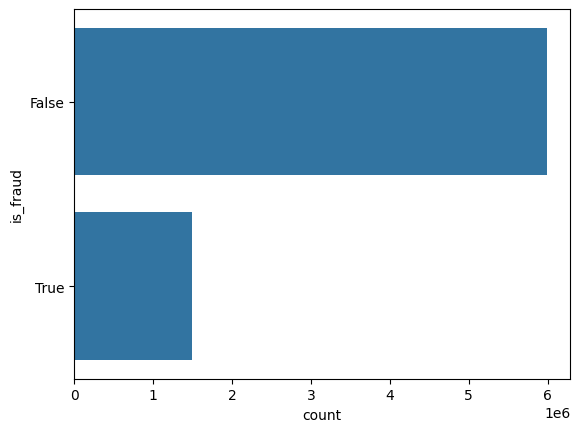

In [36]:
show_countplot(transactions_df, column='is_fraud')

### Корреляция числовых признаков

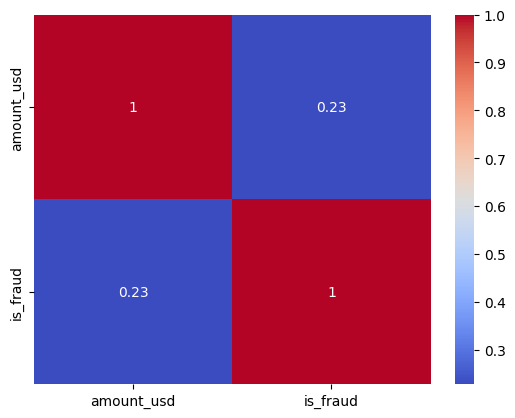

In [53]:
show_corr_heatmap(transactions_df, columns=['amount_usd', 'is_fraud'])

Корреляцию сумм в USD и целевой переменной нельзя считать значительной.

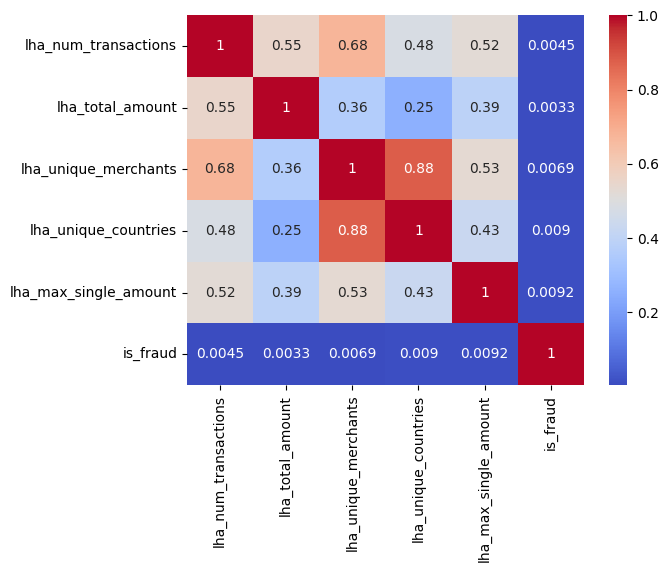

In [56]:
lha_columns = [column for column in transactions_df.columns if column.startswith('lha_')]

show_corr_heatmap(transactions_df, columns=lha_columns + ['is_fraud'])

### Корреляция булевых признаков

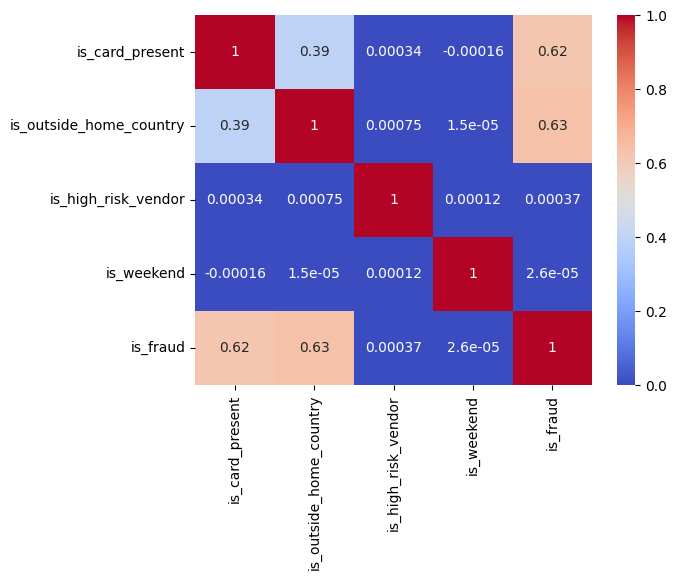

In [63]:
show_corr_heatmap(transactions_df, columns=bool_columns)

Корреляцию признаков `is_card_present`, `is_outside_home_country` и целевой переменной можно считать достаточной и использовать при разработке модели определения мошеннических транзакций.

### Корреляция категориальных признаков

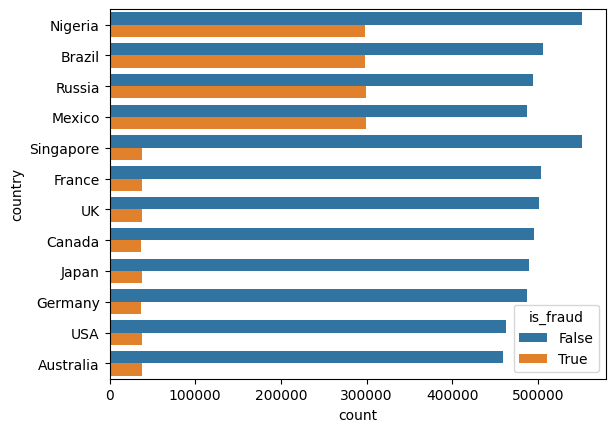

In [42]:
show_countplot(transactions_df, column='country', hue='is_fraud', sort=True)

Наибольшее количество мошеннических транзакций наблюдается в Нигерии, Бразилии, России и Мексике.

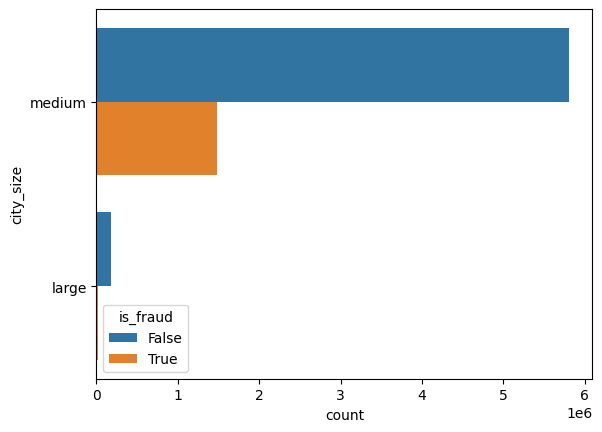

In [44]:
show_countplot(transactions_df, column='city_size', hue='is_fraud', sort=True)

Мошеннические транзакции совершались в основном в городах среднего размера.

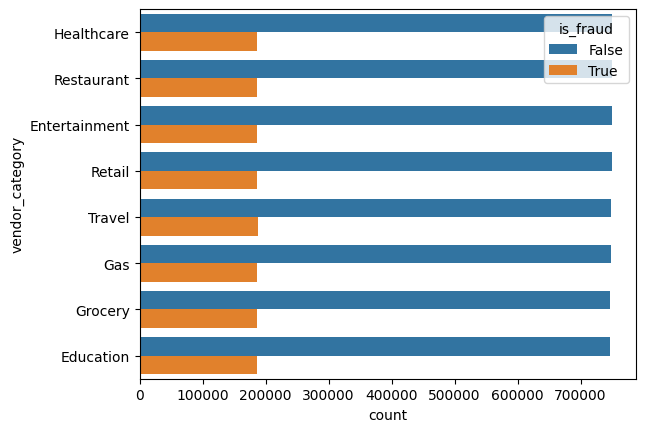

In [45]:
show_countplot(transactions_df, column='vendor_category', hue='is_fraud', sort=True)

Распределение по категориям вендоров примерно одинаково.

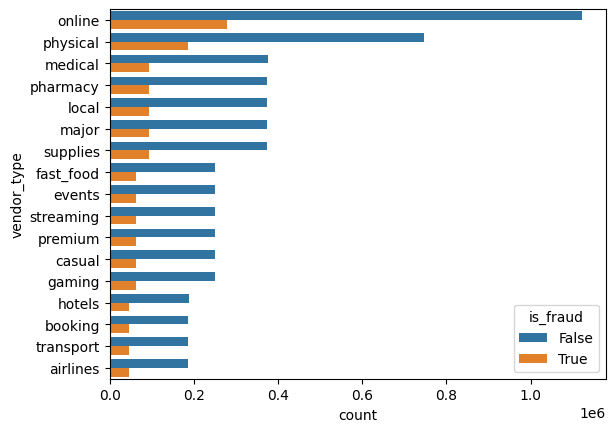

In [46]:
show_countplot(transactions_df, column='vendor_type', hue='is_fraud', sort=True)

Наибольшее количество мошеннических транзакций были физическими или проведены онлайн.

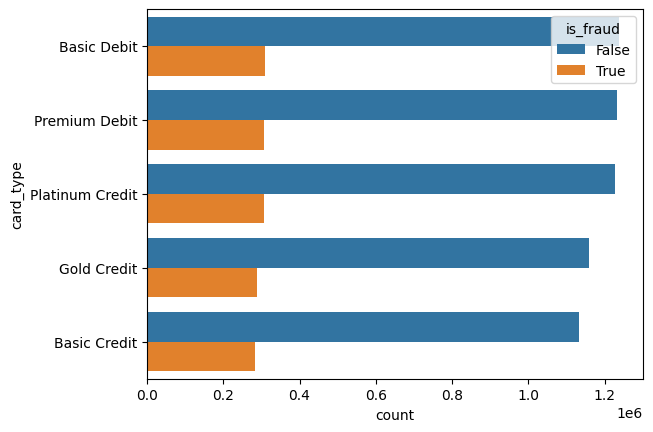

In [47]:
show_countplot(transactions_df, column='card_type', hue='is_fraud', sort=True)

Наибольшее количество мошеннических транзакций было совершено с использованием дебетовых карт.

### Временные признаки

In [20]:
transactions_df['hour'] = transactions_df['timestamp'].dt.hour
transactions_df['weekday'] = transactions_df['timestamp'].dt.day_name()

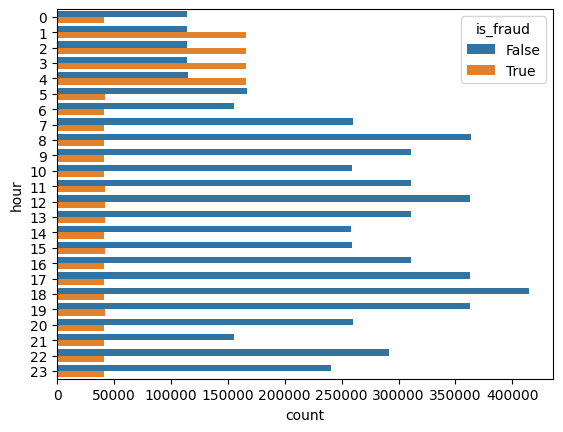

In [24]:
show_countplot(transactions_df, column='hour', hue='is_fraud')

Большинство мошеннических транзакций происходит ночью, в период с 1:00 до 5:00.

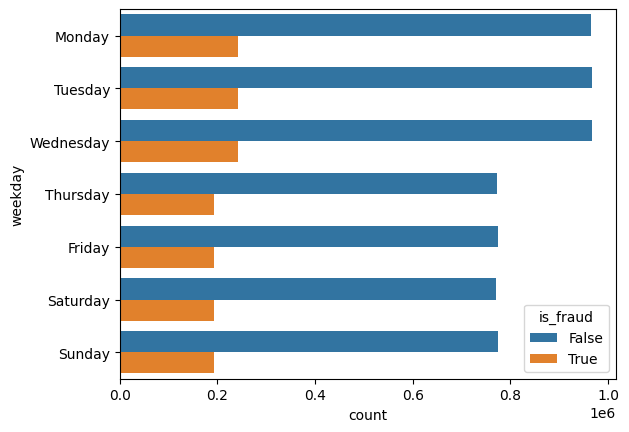

In [25]:
show_countplot(transactions_df, column='weekday', hue='is_fraud')

Чаще всего мошенническиен транзакции совершались в первые три дня недели.

### Итог

Для определения мошеннических транзакций можно использовать такие признаки, как `is_card_present`, `is_outside_home_country`, а также время проведения транзакции.